In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


np.random.seed(0)

In [ ]:
non_feature_columns = ['Ticker Symbol', 'Period Ending', 'Sector', 'For Year', 'Next Qtr. Avg. Price', 'Q avg to Q avg Price % Change', 'Y avg to Y avg Price % Change', 'Up or Down Q over Q', 'Up or Down Y over Y', 'Buy, Hold, or Sell']
less_useful_parameters = ["Add'l income/expense items", "Deferred Asset Charges", "Deferred Liability Charges", "Effect of Exchange Rate", "Minority Interest", "Misc. Stocks", "Non-Recurring Items", "Other Assets", "Other Current Assets", "Other Current Liabilities", "Other Equity", "Other Financing Activities", "Other Investing Activities", "Other Liabilities", "Other Operating Activities", "Other Operating Items"]
target_variable = 'Q avg to Q avg Price % Change'

# Load the merged data
data = pd.read_csv('../data/lr_data.csv')
data = data.drop(data.columns[0], axis=1)

# Get the features X and target variable y
features = data.columns.difference(non_feature_columns)
X = data[features] 
y = data[target_variable]


In [3]:
# Split data into train and test

def split_data(group, train_size=0.7):
    if len(group) > 1:
        train, test = train_test_split(group, train_size=train_size, shuffle=False)
    else:
        train, test = group, group
    return train, test

# Initialize empty DataFrames for training and testing data
train_data = pd.DataFrame()
test_data = pd.DataFrame()

# Group by 'Ticker Symbol' and split the data
for symbol, group in data.groupby('Ticker Symbol'):
    train_group, test_group = split_data(group)
    train_data = pd.concat([train_data, train_group])
    test_data = pd.concat([test_data, test_group])

# Reset the index of the resulting DataFrames
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)


train_data.to_csv('./outputs/lr_train_data.csv')
test_data.to_csv('./outputs/lr_test_data.csv')

X_train = train_data[features]
y_train = train_data[target_variable]

X_test = test_data[features]
y_test = test_data[target_variable]


In [4]:
# Standardize the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)



In [5]:
# Build and train the model

model = LinearRegression()
model.fit(X_train_pca, y_train)



LinearRegression()

R-squared: -0.39


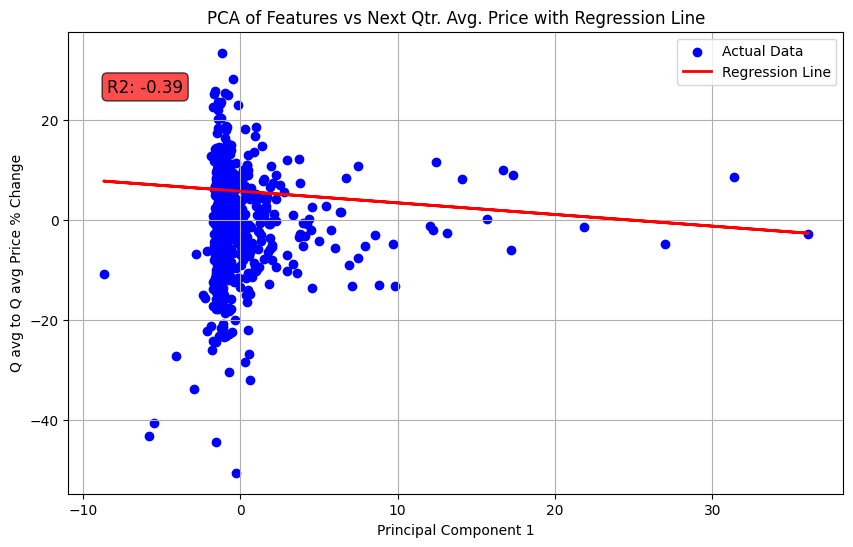

In [6]:
# Evaluate the model

y_pred = model.predict(X_test_pca)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

# Plotting the regression line  
plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca, y_test, color='blue', label='Actual Data')
plt.plot(X_test_pca, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Principal Component 1')
plt.ylabel(target_variable)
plt.title('PCA of Features vs Next Qtr. Avg. Price with Regression Line')
plt.legend()
# Add text for R-squared
plt.text(0.05, 0.90, f'R2: {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='red', alpha=0.7))

plt.grid(True)
plt.show()




